This ipynb file is from my Data Mining class homework. I want to take this idea and flesh it out a bit more

# Part 1

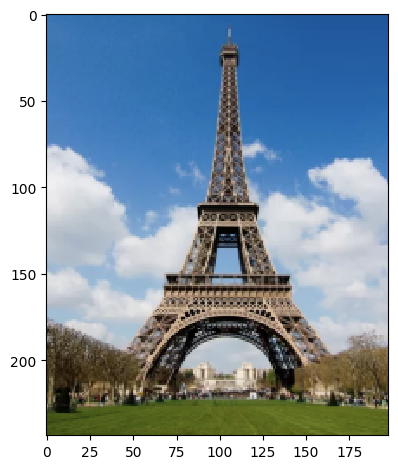

In [ ]:
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image

img = skimage.io.imread('image.png')
skimage.io.imshow(img)
plt.show()

In [ ]:
def normalize(img):
  img_norm=np.empty([244,198,3])
  for i in range(len(img)):
    for j in range(len(img[i])):
      for k in range(len(img[i][j])):
        rgb = img[i][j][k]
        rgb = round(rgb/255,3)
        img_norm[i][j][k]=rgb
  return img_norm


def euclidean(x, y):
  dist=0
  for i in range(1,len(x)):
    dist+=((float(x[i])-float(y[i]))**2)

  dist=math.sqrt(dist)
  return dist

In [ ]:
#final working version

def k_means_recolor(k):
  test=normalize(img)
  c_assignment_dict={}
  init_list=[[0, 0, 0], [0.1, 0.1, 0.1], [0.2, 0.2, 0.2], [0.3, 0.3, 0.3], [0.4, 0.4, 0.4], [0.5, 0.5,0.5], [0.6, 0.6, 0.6], [0.7, 0.7, 0.7], [0.8, 0.8, 0.8], [0.9, 0.9, 0.9]]
  c_list=init_list[:k]
  new_c_list=[]

  iters=0

  while iters < 50 and not np.array_equal(c_list, new_c_list):
    c_assignment_dict={} #reempty the assignemnt dict
    if new_c_list != []: #if new list is not empty,
      c_list=new_c_list #assign previous list as old list, and we will create a new list now...

    #for each pixel
    for i in range(len(test)):
      for j in range(len(test[i])):
        dist_dict={} #create empty dict of distances to each centroid using indexes.
        pix=list(test[i][j]) #convert pixel object to list of rgb values

        for c_index in range(len(c_list)): #for index in range 0-9
          dist_dict[c_index]=euclidean(pix, c_list[c_index]) #{index: distance}
        #print(f'dist dict={dist_dict}')

        assignment=min(dist_dict, key = dist_dict.get) #get index of the closest centroid
        #print(f'pixel: {pix}, assignment:{assignment}')
        if c_assignment_dict.get(assignment) is None: #if the centroid doesn't have an entry,
          c_assignment_dict[assignment]=[] #assign it an empty list
        c_assignment_dict[assignment].append(pix)

    #update centroids based on mean
    new_c_list=np.zeros([len(c_list),3]) #make new empty list to be filled
    for centroid in c_assignment_dict: #for each key, which should be the index 0-9
      N=len(c_assignment_dict[centroid])
      new=[0,0,0]

      for p in c_assignment_dict[centroid]: #for each pixel in the assignment list for that centroid
        new[0]+=p[0]
        new[1]+=p[1]
        new[2]+=p[2]
      new[0],new[1],new[2]=round(new[0]/N,2),round(new[1]/N,2),round(new[2]/N,2) #avg
      new_c_list[centroid]=new #at this index, assign new centroid vals

    iters+=1
  print(f'new c list:\n{new_c_list}')
  print(f'iters:{iters}')


  #SSE CALC
  SSE=0
  for i in range(len(new_c_list)): #for each centroid
    for pixel in c_assignment_dict[i]: #for each pixel assigned to this centroid
      SSE+=euclidean(pixel, c_list[i])**2
  print(f'SSE={SSE}')


  #RECOLOR
  new_colors=[[60, 179, 113],[0, 191, 255],[255, 255, 0],[255, 0, 0],[0, 0, 0],[169, 169, 169],[255, 140, 0],[128, 0, 128],[255, 192, 203],[255, 255, 255]]
  new_img_arr=np.zeros((244, 198, 3), 'uint8')
  for i in range(len(test)):
    for j in range(len(test[i])):
      pixel=list(test[i][j])
      keys=[key for key, values in c_assignment_dict.items() if pixel in values]
      final_c=keys[0]
      new_img_arr[i][j]=new_colors[final_c]

  new_image=Image.fromarray(new_img_arr)
  new_image.save('myimg.png')
  my_img = skimage.io.imread('myimg.png')
  skimage.io.imshow(my_img)

<ipython-input-81-39955a423b37>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_c_list != []: #if new list is not empty,


new c list:
[[0.32 0.31 0.19]
 [0.46 0.6  0.74]]
iters:6
SSE=1833.0764140000335


/usr/local/lib/python3.9/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


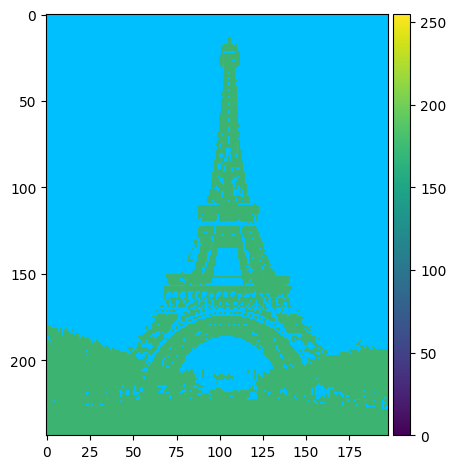

In [ ]:
k_means_recolor(2)

<ipython-input-81-39955a423b37>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_c_list != []: #if new list is not empty,


new c list:
[[0.18 0.15 0.1 ]
 [0.4  0.39 0.25]
 [0.46 0.6  0.75]]
iters:11
SSE=1608.0895139999675


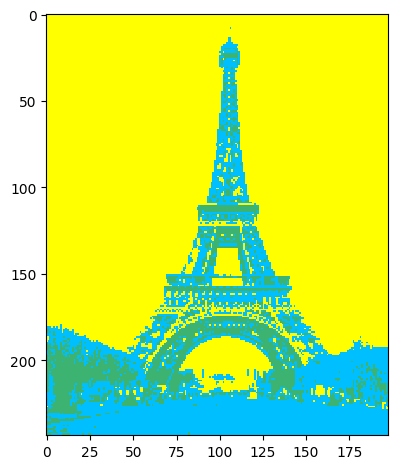

In [ ]:
k_means_recolor(3)

<ipython-input-81-39955a423b37>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_c_list != []: #if new list is not empty,


new c list:
[[0.16 0.13 0.09]
 [0.41 0.36 0.3 ]
 [0.62 0.56 0.51]
 [0.34 0.38 0.13]
 [0.22 0.45 0.7 ]
 [0.75 0.79 0.84]]
iters:30
SSE=303.50069400000416


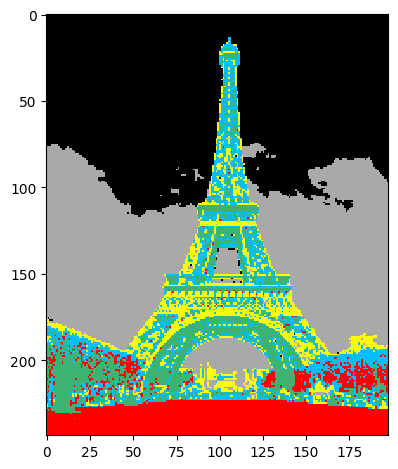

In [ ]:
k_means_recolor(6)

<ipython-input-81-39955a423b37>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if new_c_list != []: #if new list is not empty,


new c list:
[[0.11 0.09 0.06]
 [0.28 0.24 0.17]
 [0.43 0.38 0.32]
 [0.35 0.4  0.12]
 [0.61 0.55 0.5 ]
 [0.16 0.39 0.65]
 [0.24 0.47 0.72]
 [0.47 0.61 0.76]
 [0.71 0.76 0.82]
 [0.84 0.85 0.88]]
iters:23
SSE=132.53531399999412


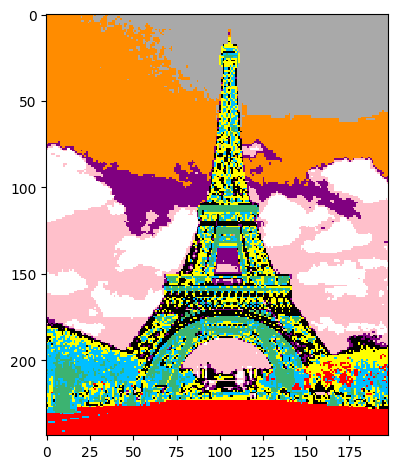

In [ ]:
k_means_recolor(10)